# Assignment 2
## Naive Bayes Classifier

# Naive Bayes-

## Preprocessing-
You have textual data that you cannot feed into the model. Therefore, you need to extract features from the text (email) and transform the data. There are techniques to do so, such as Bag of Words, n-grams, Tf-Idf, Word2Vec, CountVectorizer, and many others.

## The Model-
Test train split, using 80% for training, rest for testing. Next you will need to train NB model(Gausian) for classification.

Create the model using training data, predict on the test data, and get the accuracy, plot the confusion matrix.

## Metrics to report-
You will need to report-
1. Accuracy Score(metrics.accuracy_score)
2. Confusion Matrix(metrics.confusion_matrix) plotted graphically(It needs to be in the final jupyter file which you submit)

## Answer the following questions-
Do not include too much information, it has to be consise. Just your student ids, and the necessary info.
1. Briefly explain your approach, any preprocessing, explain the output, any visualisation for explanation, in same jupyter file. (3-4 paragraphs max)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Any other relevant import for feature extraction

In [ ]:
df = pd.read_csv("dataset_NB.csv")
df.isna().sum()

email    1
label    0
dtype: int64

In [ ]:
# Preprocess
df.dropna(subset=['email'], inplace=True)
print(df.isna().sum())


email    0
label    0
dtype: int64


In [ ]:
#1.Stopwords Removal
stop_words = set(stopwords.words('english'))
print(stop_words)

{'hasn', 'when', 'about', 'until', 'not', 'his', 'm', 'just', 'mightn', 'out', 'how', 'from', 'against', 'be', 'there', 'd', 'both', 'while', 'were', 'again', 'under', 'whom', "you're", 'o', 'shouldn', 'her', 'ma', 'i', 'before', 'who', 'aren', 'myself', 'ourselves', 'their', 'will', "mightn't", 'himself', 'down', 'doesn', 'for', 'here', 'as', 'such', 'after', 'yourself', 'each', "don't", 'own', "couldn't", 'itself', 'isn', 'with', 'so', 'weren', "should've", 're', 'yours', "shan't", 'your', 'below', 'any', 'hadn', 'herself', 'its', 'through', 'don', 'up', "you'd", 'no', 'or', 'should', 'into', 'hers', 'doing', 'we', 'you', "didn't", "that'll", 'been', 'why', 'wasn', 'them', 'all', 'ours', 'll', 'does', 'am', 'can', 'during', "mustn't", 'needn', "won't", 'between', 'are', 'being', 'couldn', 'didn', 'have', "shouldn't", 'an', 'that', 'him', 'these', 'which', 'our', 'by', 'yourselves', 'if', 'off', 'has', "hasn't", 'did', 'those', 'most', 't', 'more', 'my', 'other', 'me', 'was', 'they', 

In [ ]:
# Defining a list to store the processed data.
processed_data = []
# Iterating to each row in the DataFrame and remove stopwords from it.
for index, row in df.iterrows():
    text = row['email']
    tokens = word_tokenize(text)
    filtered_data = [token for token in tokens if token.lower() not in stop_words]
    filtered_data = ' '.join(filtered_data)
    processed_data.append(filtered_data)
    df.at[index, 'email'] = filtered_data


# Print the updated DataFrame
print(df)


                                                  email  label
0     date wed NUMBER aug NUMBER NUMBER NUMBER NUMBE...      0
1     martin posted tassos papadopoulos greek sculpt...      0
2     man threatens explosion moscow thursday august...      0
3     klez virus die already prolific virus ever kle...      0
4     adding cream spaghetti carbonara effect pasta ...      0
...                                                 ...    ...
2995  abc good morning america ranks NUMBER christma...      1
2996  hyperlink hyperlink hyperlink let mortgage len...      1
2997  thank shopping us gifts occasions free gift NU...      1
2998  famous ebay marketing e course learn sell comp...      1
2999  hello chinese traditional 子 件 NUMBER世 o最有效的宣 鞣...      1

[2999 rows x 2 columns]


'iterrows()' method is used to iterate over each row in the DataFrame. The text in each row is processed using the same tokenization and filtering code as before, and the resulting filtered text is appended to the processed_text list. Finally, the program replaces the original text data in the DataFrame with the filtered text using the df.at[] method, and prints the updated DataFrame.

In [ ]:
#2.Stemming and Lemmatization
# Creating a WordNet lemmatizer object
lemmatizer = WordNetLemmatizer()

# Creating a Porter stemmer object.
stemmer = PorterStemmer()

# Defining a list to store the stemmed text.
stemmed_text = []

# Iterating over each row in the DataFrame and performing stemming to it.
for index, row in df.iterrows():
    text = row['email']
    tokens = word_tokenize(text)
    lemmatized_data = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_data = [stemmer.stem(token) for token in lemmatized_data]
    stemmed_data.append(' '.join(stemmed_data))
    df.at[index, 'email'] = ' '.join(stemmed_data)

# Print the updated DataFrame
print(df)


                                                  email  label
0     date wed number aug number number number numbe...      0
1     martin post tasso papadopoulo greek sculptor b...      0
2     man threaten explos moscow thursday august num...      0
3     klez viru die alreadi prolif viru ever klez co...      0
4     ad cream spaghetti carbonara effect pasta make...      0
...                                                 ...    ...
2995  abc good morn america rank number christma toy...      1
2996  hyperlink hyperlink hyperlink let mortgag lend...      1
2997  thank shop u gift occas free gift number numbe...      1
2998  famou ebay market e cours learn sell complet e...      1
2999  hello chines tradit 子 件 number世 o最有效的宣 鞣绞剑 您想 ...      1

[2999 rows x 2 columns]


In [ ]:
#3.Converting texual data
#We have textual data that you cannot feed into the model.Hence, we used tf-idf method to extract features from the (email) and transform the data
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_x = vectorizer.fit_transform(df['email'])

# Print the matrix
print(tfidf_x.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.04663001]]


In [ ]:
# Naive Bayes
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df['label'], test_size=0.2, random_state=42)

Accuracy: 97.0
Precision: 0.970
Recall: 0.970
Confusion matrix:


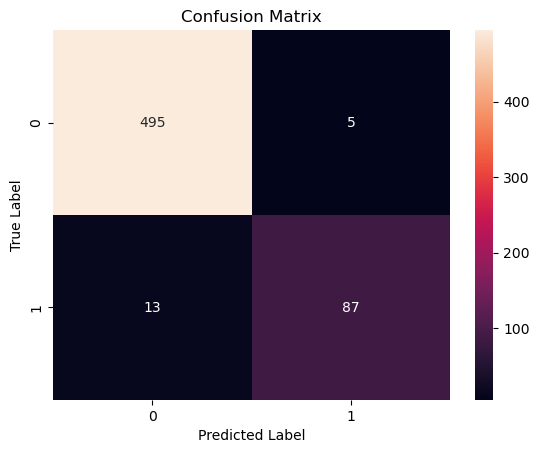

In [ ]:
# Metrics and plots
clf = GaussianNB()

# Train the model on the training set
clf.fit(x_train.toarray(), y_train)
y_pred = clf.predict(x_test.toarray())

# Compute the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

#Compute the precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: {:.3f}".format(precision))

# Calculate the recall of the classifier
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: {:.3f}".format(recall))

# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Extra - Can you do better?
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['email'])
print(x)

  (0, 4873)	4
  (0, 23883)	2
  (0, 14329)	84
  (0, 1619)	2
  (0, 3642)	2
  (0, 8020)	2
  (0, 4731)	2
  (0, 14555)	2
  (0, 5023)	4
  (0, 4017)	4
  (0, 12909)	2
  (0, 9715)	2
  (0, 21894)	2
  (0, 23432)	2
  (0, 18419)	2
  (0, 6644)	4
  (0, 18386)	2
  (0, 11932)	2
  (0, 6769)	2
  (0, 21824)	2
  (0, 24144)	2
  (0, 7025)	2
  (0, 4972)	2
  (0, 12133)	2
  (0, 16626)	18
  :	:
  (2998, 11512)	2
  (2998, 2118)	4
  (2998, 23686)	2
  (2998, 12982)	2
  (2998, 25110)	2
  (2998, 25098)	2
  (2998, 25241)	2
  (2998, 25212)	2
  (2998, 25152)	2
  (2998, 25213)	2
  (2998, 25231)	2
  (2998, 25100)	2
  (2998, 25196)	2
  (2998, 13696)	2
  (2998, 8778)	4
  (2998, 25224)	2
  (2998, 25145)	2
  (2998, 25146)	2
  (2998, 15362)	2
  (2998, 24380)	2
  (2998, 25181)	2
  (2998, 25154)	2
  (2998, 17866)	2
  (2998, 12369)	2
  (2998, 24605)	2


A corpus of text is converted into a vector of term/token counts using this technique. Tokenizing the text into separate words or tokens and then calculating the frequency of each word in the text is how the CountVectorizer functions.

REPORT
Basic Approach
1.Data preprocessing: Cleaning and preparing the textual dataset is the initial stage in data preparation. To do this, the text data must be stemmed or lemmatized, as well as any undesirable characters, and stopwords.

2.Feature extraction: The next stage is to extract features from the textual material that has been previously processed. We must transform the textual data in the tf-idf case into a numerical vector representation. To do this, the tf-idf weight for each term in the corpus is calculated.

3.Vectorization: After the features have been extracted, the textual data needs to be vectorized. In order to do this, one must create a document-term matrix in which each row corresponds to a document and each column to a term. The tf-idf weight for each phrase in each document is contained in the matrix's cell values.

4.Training a machine learning model: After vectorizing the textual data, we can train a model to classify the dataset.


5.Evaluation of the model: Lastly, we assess how well the Naive Bayes model performed on a test dataset. We can utilize a variety of evaluation criteria,  recall, accuracy, and precision.

Preprocessing
Stopwords Removal:Stopwords are eliminated so that we can concentrate on the text's more important and illuminating words. This can aid in lowering data noise and enhancing the precision of text classification, and other text analysis applications. Additionally, eliminating stopwords can assist in shrinking the vocabulary, which can conserve computing and memory resources during analysis.

Stemming and lemmatization: It reduces words to their base form, which can help to reduce the dimensionality of the data and improve the accuracy of text analysis.

Explaination of Confusion Matrix:
True positives (TP): These are the cases where the model predicted the positive class correctly, and the actual class was also positive. So here we can se 465 TP values

False positives (FP): These are the cases where the model predicted the positive class, but the actual class was negative. We can see 5 FP values

True negatives (TN): These are the cases where the model predicted the negative class correctly, and the actual class was also negative. We can see 13 TN values

False negatives (FN): These are the cases where the model predicted the negative class, but the actual class was positive. We can see 87 FN values
That means our model is quite accurate and have classified the dataset quite accurately.

# **Reference**
https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c